In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 실습 평가 과제



#### 과제 1.
아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

Q2. df를 수정하여 3가지 이상의 인사이트를 포함한 데이터셋으로 변환 후 데이터셋을 data_gen.csv 파일 로 저장하세요.




## 과제 1
- Numpy_거래데이터_실습_1st.ipynb
  - 1차 DATASET 가공은 완료 "data_gen.csv" 저장 완료

### Insights 및 수정 사항
  - 수정 사항 1: 대동 소이한 남/여에 따른 구매력 수정 필요 남성 대비 여성의 구매력 증가 (난수 수정)
  - 수정 사항 2: 남/여에 따라 선호하는 상품 금액대 조정 (상품 가격 그룹 수정 및 그에 따른 상품 코드 수정)<br>
  (남성의 경우 저가 상품 및 고가 상품의 비율이 낮고 상대적으로 중가 제품 선택 빈도 높음) <br>
  - 수정 사항 3: 연령대에 따른 구매력 차이 ex) 10대/60대이상 구매력을 낮추고, 30대, 20대, 40대 순으로 수정 (상품 가격 그룹 수정 그에 따른 상품 코드 수정)<br>
  - 수정 사항 4: 연령대에 따라 선호하는 상품 금액대 조정 <br>
  (10대 저가 상품 선호, 40대 이상 고가품 선호로 수정: (상품 가격 그룹 수정 및 그에 따른 상품 코드 수정)) <br>
  - 수정 사항 5: 주 고객층을 20대 후반에서 30대 중반의 여성으로 변경
  - 수정 사항 6: 1~10 에 따라 특정 도시라 가정하고 도시 규모/인구에 구매력 조정
  - 수정 사항 7: 상품 가격대 분포 조정 하나의 상품 코드에 하나의 가격 matching ==> Multi-Peaks Gaussian Distribution 적용 <br>
  - 수정 사항 8: 상품 구매액 분포 조정 <br>
  - 수정 사항 9: 2020년 vs. 2021년 매출 조정 (코로나 팬데믹으로 인해 20년 중반기 이후 인터넷 주문량 급증 반영, 난수 수정)<br>
  - 수정 사항 10: 수정 사항 10: 여름철 대비 겨울철에 의류 가격이 상대적으로 고가인 제품 주문량이 증가 반영 (상품 가격 그룹 수정 및 그에 따른 상품 코드 수정)<br>
  - 수정 사항 11: 시간 구간별 매출을 'PrimeTime' >> 'DayTime' > 'DayBreak' 순으로 수정 반영 (난수 수정) <br>

#### 과제2
data_gen.csv 파일을 불러와서 데이터셋에 대한 통계적 탐색을 수행하고 아래 예시를 참조하여 분석용 데이터셋으로서 가치를 제고하기 위한 수정작업을 하신 후 데이터셋이 포함하고 있는 특징 및 인사이트를 정리하여 기술하고 그 결과 파일을 data_rev.csv 이름으로 저장하세요.

#### Reasonable한 데이터셋 구축을 위해 DB에 통계적 특성을 규현
(1차 실습 시 11가지 수정 사항에 대한 data 탐색 및 추가 Price vs. Quantity 특성 수정)
- 상품 가격대 분포 조정 각 인터넷 판매 싸이트마다 히트 상품이 있을 것이고 이러한 상품들에 판매 실적의 peak가 있을 것이므로 ==> Multi-Peaks Gaussian Distribution 적용 <br>
- 위와 같은 price 조정과 더블어 판매 개수에 있어서도 1~100개까지 주문하는건 현실과는 동떨어짐. ~5 이하 개수 주문이 주류일 것이므로 이를 반영하기 위해 log-normal distribution을 반영하여 최종 상품 구매액 분포 조정 <br>
- 난수 발생을 통한 대동 소이한 남/여에 따른 구매력은 현실에 맞지 않아 인터넷 의류 쇼핑몰이란 가정에 맞게 남성 대비 여성의 구매력 증가 시킴
- 남/여에 따라 선호하는 상품 금액대가 다를 것이고 과제에서는 남성의 경우 저가 상품 및 고가 상품의 비율이 낮고 상대적으로 중가 제품 선택 빈도 높음, 여성이 상대적으로 고가품을 구매하는 경향을 반영 <br>
- 연령대에 따른 구매력 차이 현실 반영: 10대/60대이상 구매력을 낮추고, 30대, 20대, 40대 순으로 수정<br>
- 연령대에 따라 선호하는 상품 금액대 조정 <br>
  (10대 저가 상품 선호, 40대 이상 고가품 선호로 수정) <br>
- 위와 같은 성별,연령대 반영으로 주 고객층을 20대 후반에서 30대 중반의 여성으로 조정
- 현실은 지역별로 인구가 상이해서 고객층이 상이. 이를 반영하기 위해 특정 도시라 가정하고 도시 규모/인구에 구매력 조정
- 2020년 vs. 2021년 매출 조정 (코로나 팬데믹으로 인해 20년 중반기 이후 인터넷 주문량 급증 반영)<br>
- 여름철 대비 겨울철에 의류 가격이 상대적으로 고가인 제품 주문량이 증가 반영 <br>
- 시간 구간별 매출을 PrimeTime (18시-12시) >> DayTime (7시-18시): 점심시간에 주문 slightly peak 반영 > DayBreak (12시-7시) 순으로 수정 반영 <br>
- 추가적으로 구매 수량의 경우 log-normal distribution으로 data를 어느정도 현실을 반영했지만, 여전히 box plot으로보면 많은 data가 이상치로 들어가 있어 이를 수정

### 가격, 구매 수량, 총 구매 금액 분포를 정규분포 적용 (Numpy_거래데이터_실습_1st.ipynb 참고)
- 1차 data 생성 시 이미 가격과 구매 수량에 이미 가우시안 분포를 적용 완료 <br>
  (구매 수량의 경우 Log(x)가 가우시안 분포를 그리도록 설정: Log-normal Distribution)
- 가격대의 경우 저가, 중가, 고가 물품 가테고리 중 인기 품목이 있을 것이고 이는 multi-peak distribution을 가질 것이라 판단하고 ~5000 (저가 소품), ~30000 (남성 선호), ~40000 (여성 주로 선호)에서 peak를 갖는 distribution을 Gaussian 분포 구현 완료 <br>

In [26]:
import numpy as np
import pandas as pd
file_path = '/content/drive/MyDrive/KITA_2024/M3_분석라이브러리/M3_실습/data_gen.csv'
df = pd.read_csv(file_path)

In [27]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderID         10000 non-null  int64 
 1   CustID          10000 non-null  int64 
 2   ProdID          10000 non-null  int64 
 3   Quantity        10000 non-null  int64 
 4   Gender          10000 non-null  int64 
 5   Age             10000 non-null  int64 
 6   Region          10000 non-null  int64 
 7   Price           10000 non-null  int64 
 8   OrderAmount     10000 non-null  int64 
 9   AgeGroup        10000 non-null  object
 10  PriceCategory   10000 non-null  object
 11  OrderDate       10000 non-null  object
 12  OrderDW         10000 non-null  object
 13  OrderTime       10000 non-null  object
 14  Year            10000 non-null  int64 
 15  Season          10000 non-null  object
 16  OrderTimeGroup  10000 non-null  object
dtypes: int64(10), object(7)
memory usage: 1.3+ MB


In [28]:
# 결측치 확인
data.isnull().sum().sum()

0

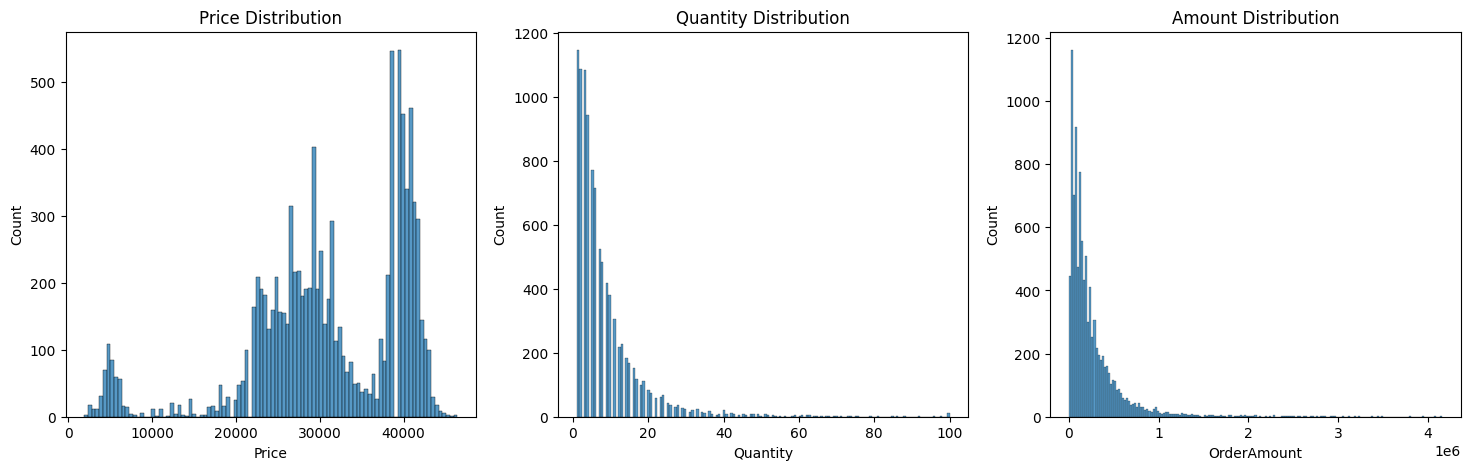

In [29]:
# 가격, 구매 수량, 총 구매 금액 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Price'], ax=axes[0], bins=100)
axes[0].set_title('Price Distribution')

sns.histplot(data['Quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['OrderAmount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

#### 남/여 고객비 & 연령대별 고객 분포
- 인터넷 의류 쇼핑몰이라 가정하고 실습을 진행 ==> 남성에 비해 여성 고객이 주류
- 고객 연령대도 보통의 인터넷 의류 매장의 현실을 반영하여 중장년층보다는 30대 아래 고객층이 주류를 이루도록 DB를 설정 (주 고객층을 20대 후반에서 30대 중반의 여성으로)

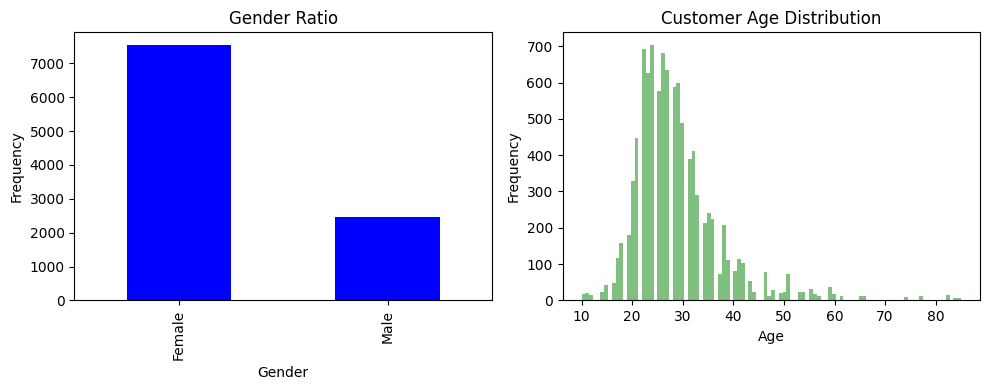

In [30]:
############## 남/녀 고객 구성비, 고객 연령대 분포
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
ax=data.groupby(['Gender']).size().plot(kind='bar', color='b')
ax.set_xticklabels(['Female', 'Male'])
plt.title('Gender Ratio')
plt.xlabel("Gender")
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
data['Age'].plot.hist(alpha=0.5, bins=100, color='g')
plt.title('Customer Age Distribution')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 연령대별 선호 상품 가격대
- 일반적으로 중장년층은 경제적으로 여유로워 고가품 위주로 구매하고 10대는 저가 상품을 주로 구매하는 경향을 반영
- 의류에는 일반적으로 남성보다는 여성이 고가 제품을 많이 사는 구매 특성을 반영하고, 남성은 상대적으로 고가나 저가 보다는 중가 제품을 많이 구매하는 실속 쇼핑 경향을 반영

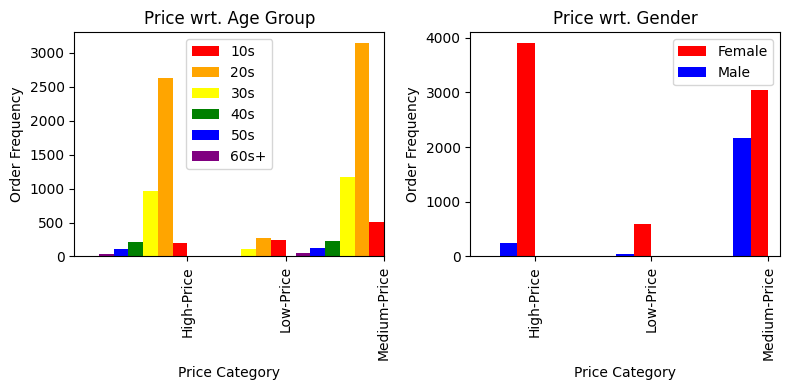

In [31]:
# 연령대에 따른 선호 상품 가격대 비교
# 구매 상품의 가격대 분류

# Plot 비교
AgeLabels = ['10s', '20s', '30s', '40s', '50s', '60s+']
PriceDistrib_Age = data.groupby(['AgeGroup', 'PriceCategory']).size()
PriceDistrib_Age = PriceDistrib_Age.unstack()

GenderList = [0, 1]
GenderLabels = ['Female', 'Male']
PriceDistrib_Gender = data.groupby(['Gender', 'PriceCategory']).size()
PriceDistrib_Gender = PriceDistrib_Gender.unstack()

# Plot 비교
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i, age_group in enumerate(AgeLabels):
    PriceDistrib_Age.loc[age_group].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=age_group)
plt.title('Price wrt. Age Group')
plt.xlabel('Price Category')
plt.ylabel('Order Frequency')
plt.legend()

plt.subplot(1, 2, 2)
colors = ['red', 'blue']
for i, Gender in enumerate(GenderList):
    PriceDistrib_Gender.loc[Gender].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=GenderLabels[i])
plt.title('Price wrt. Gender')
plt.xlabel('Price Category')
plt.ylabel('Order Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## 2020, 2021년 년도별 매출, 시간대별 매출
- 코로나 팬데믹으로 인해 20년 중반기 이후 인터넷 주문량 급증 반영<br>
- 새벽시간, 근무시간대에는 구매가 적고 저녁 시간에 활발한 구매가 이뤄짐을 반영하여 시간 구간별 매출을 'PrimeTime' >> 'DayTime' > 'DayBreak' 순으로 반영 <br>
  - PrimeTime: 18:00~24:00
  - DayBreak: 00:00~07:00
  - DayTime: 07:00~18:00

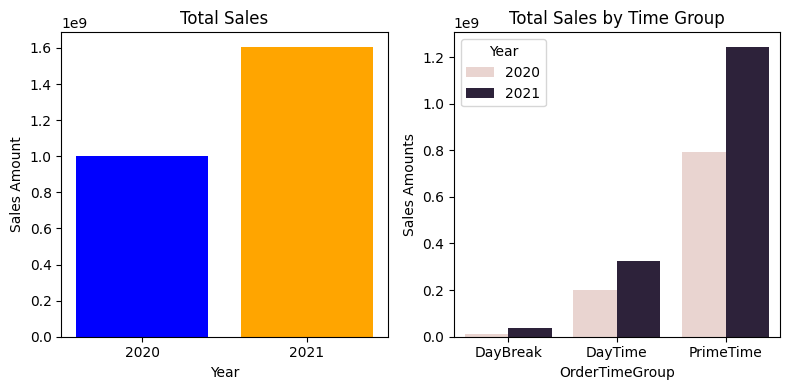

In [32]:
# 2020년과 2021년의 주문 데이터 분리
orders_2020 = data[data['Year'] == 2020]
orders_2021 = data[data['Year'] == 2021]

# 2020년과 2021년 각각의 총 매출액 계산
total_sales_2020 = orders_2020['OrderAmount'].sum()
total_sales_2021 = orders_2021['OrderAmount'].sum()


# 시간대별 총 매출 건수와 총 매출액 계산
grouped_orders_2020 = orders_2020.groupby(['OrderTimeGroup', 'Year']).apply(lambda x: pd.Series({
    'OrderCount': x['OrderID'].nunique(),
    'TotalSales': x['OrderAmount'].sum(),
})).reset_index()

grouped_orders_2021 = orders_2021.groupby(['OrderTimeGroup', 'Year']).apply(lambda x: pd.Series({
    'OrderCount': x['OrderID'].nunique(),
    'TotalSales': x['OrderAmount'].sum(),
})).reset_index()


# 시각화
years = ['2020', '2021']
total_sales = [total_sales_2020, total_sales_2021]

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.bar(years, total_sales, color=['blue', 'orange'])
plt.title('Total Sales')
plt.ylabel('Sales Amount')
plt.xlabel('Year')

plt.subplot(1, 2, 2)
sns.barplot(x='OrderTimeGroup', y='TotalSales', hue='Year', data=pd.concat([grouped_orders_2020, grouped_orders_2021]))
plt.title('Total Sales by Time Group')
plt.ylabel('Sales Amounts')
plt.tight_layout()
plt.show()

## 계절별 매출 분포
- 여름철 대비 겨울철에 구매 실적이 높은 것을 반영하고 <br>
- 의류 가격 역시 여름 대비 겨울에 상대적으로 고가인 제품이 주류임을 반영 <br>

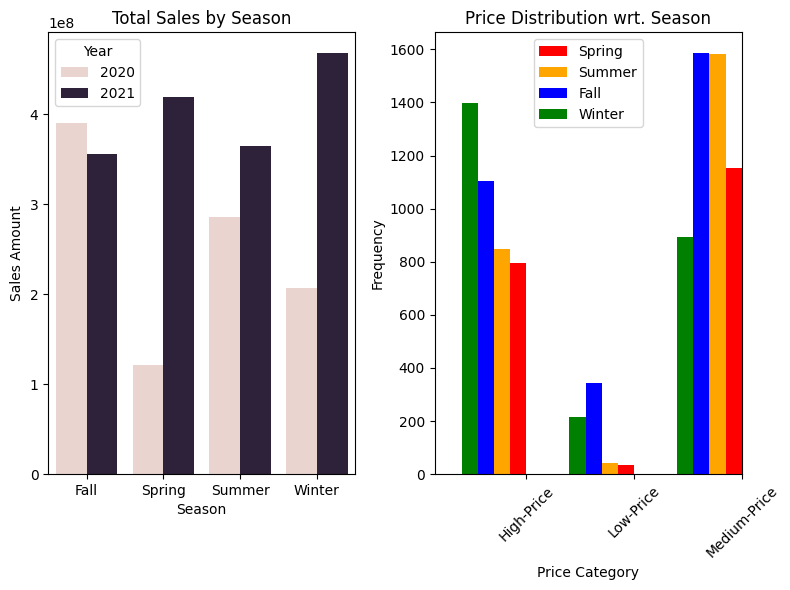

In [33]:
grouped_orders_2020_season = orders_2020.groupby(['Season', 'Year']).agg({'OrderID': 'nunique', 'OrderAmount': 'sum'}).reset_index()
grouped_orders_2021_season = orders_2021.groupby(['Season', 'Year']).agg({'OrderID': 'nunique', 'OrderAmount': 'sum'}).reset_index()

# 계절에 따른 선호 상품 가격대 비교
SeasonLabels = ['Spring', 'Summer', 'Fall', 'Winter']
PriceDistrib_Season = data.groupby(['Season', 'PriceCategory']).size()
PriceDistrib_Season = PriceDistrib_Season.unstack()

# 시각화
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Season', y='OrderAmount', hue='Year', data=pd.concat([grouped_orders_2020_season, grouped_orders_2021_season]))
plt.title('Total Sales by Season')
plt.ylabel('Sales Amount')

plt.subplot(1, 2, 2)
colors = ['red', 'orange', 'blue', 'green']
for i, Season in enumerate(SeasonLabels):
    PriceDistrib_Season.loc[Season].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=Season)
plt.title('Price Distribution wrt. Season')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 구매 고객의 지역 분포
- 인구 밀집 지역인 서울/경기권 도시들에 고객층이 두터울 것을 모사하여 고객 지역 분포 설정

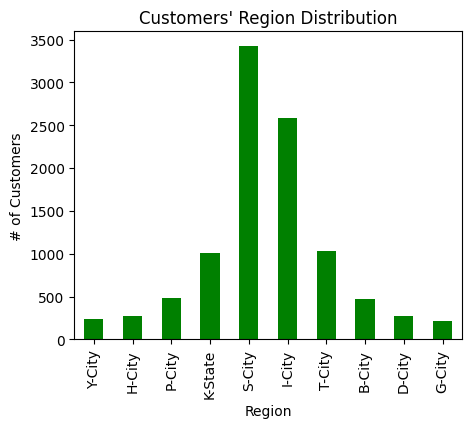

In [34]:
# 구매 고객 지역 분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
labels = ['Y-City', 'H-City', 'P-City','K-State', 'S-City', 'I-City', 'T-City', 'B-City', 'D-City','G-City']
data['RegionName'] = pd.cut(data['Region'], bins=bins, labels=labels)

plt.figure(figsize=(5,4))
data.groupby(['RegionName']).size().plot(kind='bar', color='g')
plt.title("Customers' Region Distribution")
plt.xlabel("Region")
plt.ylabel('# of Customers')
plt.show()


## 구매 수량 이상치 제거
구매 수량 액의 분포에 이상치가 포함되어 있는데, 이를 현실에 맞게 수정

In [35]:
data['Quantity'].unique()

array([  3,  48,  17,  25,   1,   7,  41,  14,   6,  27,   5,  10,   4,
         9,  11,   2,  15,  19,  13,  23,   8,  22,  36,  12,  16,  33,
        32,  53,  18,  35,  24,  21,  40,  20,  34,  43,  39,  31,  51,
        29,  88,  49,  59,  46,  30,  28,  37,  44,  26,  76,  45,  38,
        73,  42,  62,  71,  60, 100,  47,  74,  55,  54,  70,  65,  96,
        66,  68,  63,  81,  69,  86,  52,  58,  85,  50,  61,  92,  98,
        64,  67,  56,  75,  79])

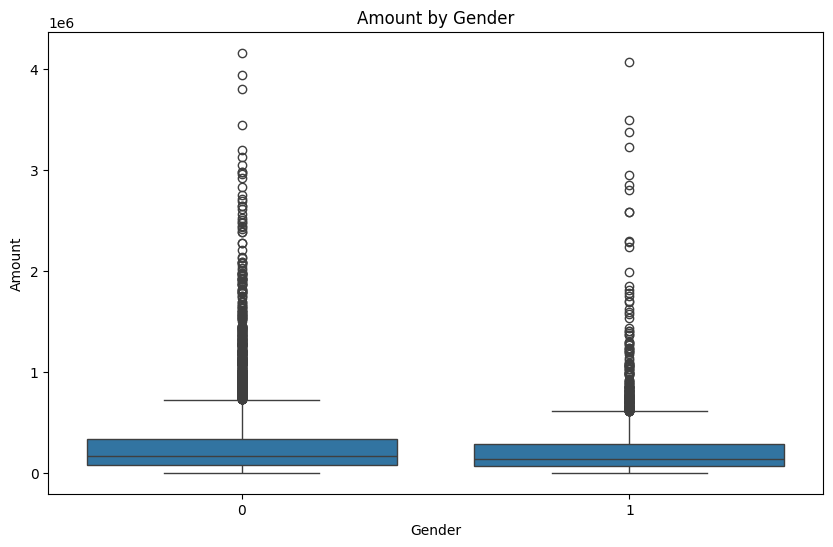

In [36]:
# 성별에 따른 총 구매 금액의 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='OrderAmount', data=data)
plt.title('Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()

In [37]:
## 구매수량 조정
## 이전 data에서는 1~100까지 난수로 구매수량이 정의 되었는데, 10개 이상의 구매 수량은 현실적이지 않음
## 1차로 구매 수량 10개 이상을 최소화 시키기 위해서 log-normal distribution을 적용하여 1차 data가공을 했지만 위의 plot에서와 같이
## 여전히 이상치가 포함되어 있으므로 구매 수량이 11이상인 data를 찾고 해당하는 value는 1~10까지의 난수로 재지정
## 구매 수량이 11 이상인 위치에 1~10까지의 난수 발생
## 가격의 경우 1000~50000까지 분포하게 해놓았기 때문에 Reasonable한 범위라고 판단하여 그대로 둠


data['Quantity'] = data['Quantity'].apply(lambda x: np.random.randint(1, 11) if x > 10 else x)
data['OrderAmount'] = data['Price'] * data['Quantity']

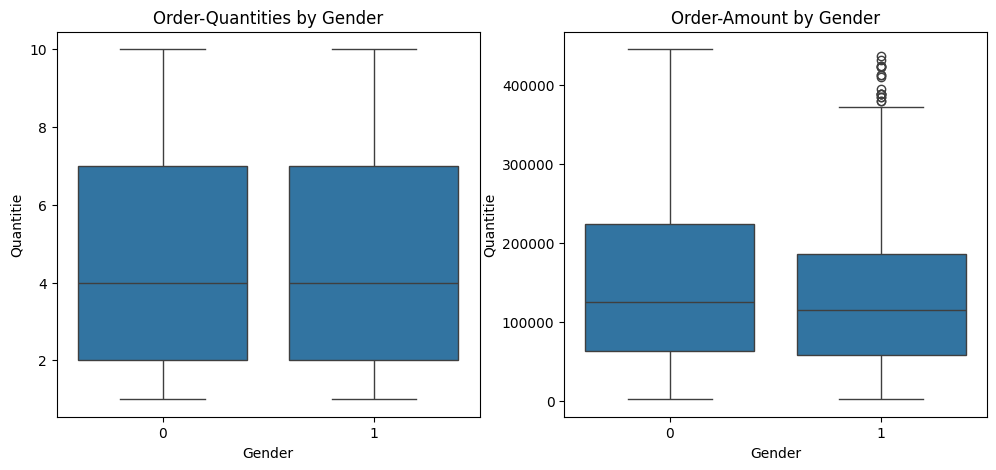

In [38]:
# 성별에 따른 총 구매 금액의 분포 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Quantity', data=data)
plt.title('Order-Quantities by Gender')
plt.xlabel('Gender')
plt.ylabel('Quantitie')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='OrderAmount', data=data)
plt.title('Order-Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Quantitie')


plt.show()

In [39]:
data.isnull().sum().sum()

0

In [40]:
### 1차 과제 수행때 잘못 이해한 부분 수정
data['ProdID'] = data['PriceCategory'].map({'High-Price': 10, 'Medium-Price': 20, 'Low-Price': 30})

In [41]:
import os
os.chdir('/content/drive/MyDrive/KITA_2024/M3_분석라이브러리/M3_실습/')
data.to_csv('data_rev.csv', index=None)

#### 과제3.
Q1. data_rev.csv를 불러와서 추가적으로 의미있는 3개의 인사이트를 반영한 후 탐색적 분석을 통하여 그 내용을 통계적 시각적으로 도출하고 인사이트가 반영되었는지 여부를 기술하시고 data_analysis.csv로 저장하세요.


In [42]:
import numpy as np
import pandas as pd
file_path = '/content/drive/MyDrive/KITA_2024/M3_분석라이브러리/M3_실습/data_rev.csv'
df = pd.read_csv(file_path)

In [43]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderID         10000 non-null  int64 
 1   CustID          10000 non-null  int64 
 2   ProdID          10000 non-null  int64 
 3   Quantity        10000 non-null  int64 
 4   Gender          10000 non-null  int64 
 5   Age             10000 non-null  int64 
 6   Region          10000 non-null  int64 
 7   Price           10000 non-null  int64 
 8   OrderAmount     10000 non-null  int64 
 9   AgeGroup        10000 non-null  object
 10  PriceCategory   10000 non-null  object
 11  OrderDate       10000 non-null  object
 12  OrderDW         10000 non-null  object
 13  OrderTime       10000 non-null  object
 14  Year            10000 non-null  int64 
 15  Season          10000 non-null  object
 16  OrderTimeGroup  10000 non-null  object
 17  RegionName      10000 non-null  object
dtypes: int6

In [44]:
data.head()

,OrderID,CustID,ProdID,Quantity,Gender,Age,Region,Price,OrderAmount,AgeGroup,PriceCategory,OrderDate,OrderDW,OrderTime,Year,Season,OrderTimeGroup,RegionName
0,1,10679,10,3,0,29,6,41600,124800,20s,High-Price,2020-02-22 22:03:00,Saturday,22:03:00,2020,Winter,PrimeTime,I-City
1,2,10269,20,3,1,33,6,22000,66000,30s,Medium-Price,2020-03-04 20:48:00,Wednesday,20:48:00,2020,Spring,PrimeTime,I-City
2,3,10577,20,2,1,32,1,31700,63400,30s,Medium-Price,2020-02-01 13:33:00,Saturday,13:33:00,2020,Winter,DayTime,Y-City
3,4,10895,10,5,0,30,1,39400,197000,20s,High-Price,2020-03-01 21:11:00,Sunday,21:11:00,2020,Spring,PrimeTime,Y-City
4,5,10765,10,1,0,33,6,41600,41600,30s,High-Price,2020-02-15 20:45:00,Saturday,20:45:00,2020,Winter,PrimeTime,I-City


In [45]:
data['Gender2'] = data['Gender'].map({0: 'Female', 1: 'Male'})

In [46]:
data.head()

,OrderID,CustID,ProdID,Quantity,Gender,Age,Region,Price,OrderAmount,AgeGroup,PriceCategory,OrderDate,OrderDW,OrderTime,Year,Season,OrderTimeGroup,RegionName,Gender2
0,1,10679,10,3,0,29,6,41600,124800,20s,High-Price,2020-02-22 22:03:00,Saturday,22:03:00,2020,Winter,PrimeTime,I-City,Female
1,2,10269,20,3,1,33,6,22000,66000,30s,Medium-Price,2020-03-04 20:48:00,Wednesday,20:48:00,2020,Spring,PrimeTime,I-City,Male
2,3,10577,20,2,1,32,1,31700,63400,30s,Medium-Price,2020-02-01 13:33:00,Saturday,13:33:00,2020,Winter,DayTime,Y-City,Male
3,4,10895,10,5,0,30,1,39400,197000,20s,High-Price,2020-03-01 21:11:00,Sunday,21:11:00,2020,Spring,PrimeTime,Y-City,Female
4,5,10765,10,1,0,33,6,41600,41600,30s,High-Price,2020-02-15 20:45:00,Saturday,20:45:00,2020,Winter,PrimeTime,I-City,Female


## 추가 3-Insights

 - 우선 매출이 전년 대비 증가했지만, 코로나 팬데믹에 의한 일시적인 현상임 <br> - 안정적인 매출 창출을 위해서는 가장 먼저 주된 고객 층에 때한 분석이 선행되어야할 필요가 있음 <br>



 ==> 아래 주된 고객 층에 때한 분석/탐색을 통해서 발견한 사실은<br>

 ### Insights-1

(1) 최고 주요 고객층은 20대/여성/S-City (서울)에 거주하는 고객, I-City (인천)에 거주하는 20대 여성, 그다음으로 서울 거주 30대 여성이 그 다음으로 주 고객층을 형성하고 있음
==> 20년과 21년 공히 동일한 결과임을 알수 있음

(2) 다만, 생성된 data에서 2020년에는 고가 제품을 주로 구매했다면, 2021년에는 탑 1/2 고객층에서 "High-Price" 물품에서 "Medium-Price"물품으로 구매 성향이 변경되고 있음을 알 수 있음
<br>
<br>
<br>

==> <br>
Con-1)
- 매출 증진을 위해서 서울 지역과 인천을 포함하는 경기지역권에 marketing 비용 집중 필요 <br>
- 20대-30대 여성을 target으로한 마케팅이 필요 <br>

Con-2)
- 특히 20대-30대 서울 경기 거주 여성들이 선호하는 중가 물품 대한 재고나 더 다양한 물품을 제공해서 매출 증진을 기대할 수 있음
- *** 이를 위해서 1차 data 생성 때 했던 것처럼 Prod_ID를 더욱 세분화해서 제품의 가격대와 종류에 따라 ID를 세분화해서 DB를 관리하고 고객 성향 분석에 이용될 수 있도록 하는 것이 좋음 (따로 DB에 반영하지는 않음)


In [47]:
grouped = data.groupby(['Year', 'AgeGroup', 'Gender2', 'RegionName', 'ProdID'])['OrderAmount'].sum().reset_index()
top_orders_2020 = grouped[grouped['Year'] == 2020].nlargest(3, 'OrderAmount')
top_orders_2021 = grouped[grouped['Year'] == 2021].nlargest(3, 'OrderAmount')

print("Top purchasers in 2020:")
for i, row in top_orders_2020.iterrows():
    print(f"Rank: {i+1}")
    print(f"Age Group: {row['AgeGroup']}")
    print(f"Gender: {row['Gender2']}")
    print(f"Product 분류: {row['ProdID']}")
    print(f"Region: {row['RegionName']}")
    print(f"Total Order Amount: {row['OrderAmount']}\n")

print("Top purchasers in 2021:")
for i, row in top_orders_2021.iterrows():
    print(f"Rank: {i+1}")
    print(f"Age Group: {row['AgeGroup']}")
    print(f"Gender: {row['Gender2']}")
    print(f"Product 분류: {row['ProdID']}")
    print(f"Region: {row['RegionName']}")
    print(f"Total Order Amount: {row['OrderAmount']}\n")

Top purchasers in 2020:
Rank: 41
Age Group: 20s
Gender: Female
Product 분류: 10
Region: S-City
Total Order Amount: 99691800

Rank: 38
Age Group: 20s
Gender: Female
Product 분류: 10
Region: I-City
Total Order Amount: 73461800

Rank: 68
Age Group: 30s
Gender: Female
Product 분류: 10
Region: S-City
Total Order Amount: 39519800

Top purchasers in 2021:
Rank: 189
Age Group: 20s
Gender: Female
Product 분류: 20
Region: S-City
Total Order Amount: 75660300

Rank: 180
Age Group: 20s
Gender: Female
Product 분류: 20
Region: I-City
Total Order Amount: 62770900

Rank: 188
Age Group: 20s
Gender: Female
Product 분류: 10
Region: S-City
Total Order Amount: 57741400



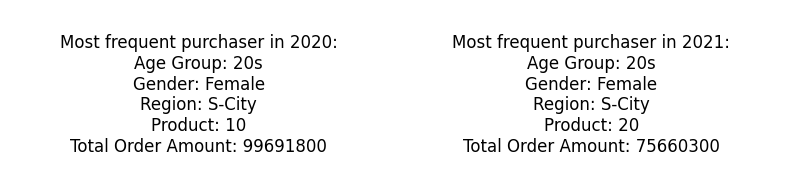

In [48]:
top_orders_2020 = grouped[grouped['Year'] == 2020].nlargest(1, 'OrderAmount').squeeze()
top_orders_2021 = grouped[grouped['Year'] == 2021].nlargest(1, 'OrderAmount').squeeze()

# 각 연도별 가장 많이 구매된 상품의 정보 추출
age_group_2020 = top_orders_2020['AgeGroup']
gender_2020 = top_orders_2020['Gender2']
region_2020 = top_orders_2020['RegionName']
order_amount_2020 = top_orders_2020['OrderAmount']
prodid_2020 = top_orders_2020['ProdID']

age_group_2021 = top_orders_2021['AgeGroup']
gender_2021 = top_orders_2021['Gender2']
region_2021 = top_orders_2021['RegionName']
order_amount_2021 = top_orders_2021['OrderAmount']
prodid_2021 = top_orders_2021['ProdID']

fig, ax = plt.subplots(1, 2, figsize=(8, 2))

# 2020년 그래프
text_2020 = f"Most frequent purchaser in 2020:\nAge Group: {age_group_2020}\nGender: {gender_2020}\nRegion: {region_2020}\nProduct: {prodid_2020}\nTotal Order Amount: {order_amount_2020}"
ax[0].text(0.5, 0.5, text_2020, horizontalalignment='center', verticalalignment='center', fontsize=12)
ax[0].axis('off')

# 2021년 그래프
text_2021 = f"Most frequent purchaser in 2021:\nAge Group: {age_group_2021}\nGender: {gender_2021}\nRegion: {region_2021}\nProduct: {prodid_2021}\nTotal Order Amount: {order_amount_2021}"
ax[1].text(0.5, 0.5, text_2021, horizontalalignment='center', verticalalignment='center', fontsize=12)
ax[1].axis('off')

plt.tight_layout()
plt.show()

### Insights - 2

 (3) 아래 Quantity vs. Price를 보면 전혀 연관성도 correlation이 없는 것 처럼 보임 <br>
 ==> 대체적으로 Price가 비싼 물품일수록 구매 수량은 줄어들고, 싼 가격일 수록 구매 수량이 늘어나는 negative correlation coefficient를 가질 확률이 높음 <br>

### Insights - 3

 (4) 주문 수량을 살펴보면 1차에서 log-normal distribution을 적용했지만, 2차 data 수정을 통해 분포가 흐트러졌고, 5개 이상에서도 여전히 많은 portion을 차지하고 있음. <br>

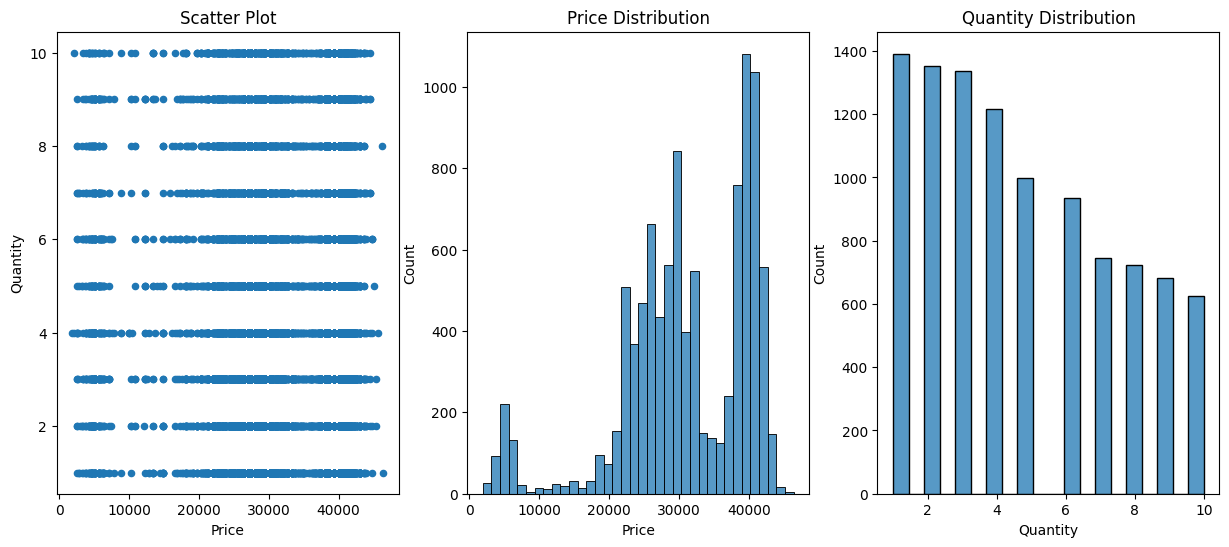

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

data.plot.scatter(x="Price",y="Quantity", ax=axes[0])
axes[0].set_title("Scatter Plot")

sns.histplot(data['Price'], ax=axes[1])
axes[1].set_title('Price Distribution')

sns.histplot(data['Quantity'], ax=axes[2])
axes[2].set_title('Quantity Distribution')


plt.show()


- Insights - 2/3에 대해서 수정하고자 하는 방향은 Price와 Quantity간 negative correlation을 갖도록 수정하면서 Qauntity 의 분포도 1-3이 주류를 이루도록 수정 <br>
- correlation을 주기 위해서는 random 성분과 systematic variation 성분을 동시에 가지도록 설정해야함,

- 이를 구현 하기 위해서 Covariance Matrix를 이용한 multivariate_normal 함수를 이용


#### Covariance Matrix vs. Correlation Coefficient 상관관계
covariance 값을 조정하여 가격과 구매수량간의 Correlation Coefficient를 정하고, 이를 Cov matrix에 반영해서 특성 그래프 설정 <br>
상관관계와 공분산 Equation <br>

Correlation
=$\frac{Cov}{STD:price*STD:quantity}$

==> Cov=$ Correlation \times STD:price \times STD:quantity$

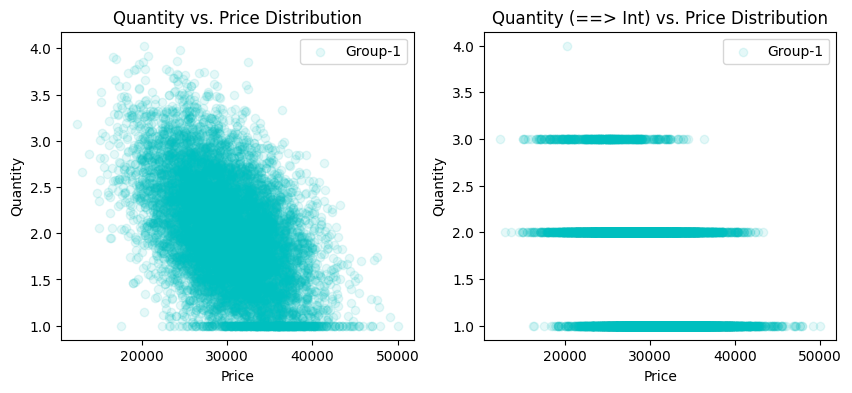

In [50]:
import numpy as np
import matplotlib.pyplot as plt
## Negative Correlation 반영을 위해 공분산 matrix와 Numpy에서 제공하는 np.random.multivariate_normal 함수를 이용해서 구현
## Implementing Systematic Variation Components Using Co-Variance (systematic/random variation 구현)
## 수량은 양의 정수를 가져야 함므로 아래와 같이 int type으로 변환해서 data set에 반영

mean = [30000, 2]     # Mean values of nFET and pFET
std_dev = [5000, 0.6]  # Standard Deviations of nFET and pFET
correlation = -0.5  # 원하는 상관관계
covariance = correlation * std_dev[0] * std_dev[1]
cov_matrix = [[std_dev[0]**2, covariance], [covariance, std_dev[1]**2]]
# 다변량 정규 분포에서 샘플 생성
Vari = np.random.multivariate_normal(mean, cov_matrix, size=10000)
Price_temp = np.clip(Vari[:, 0], 1000, 50000)
Quantity_temp = np.clip(Vari[:, 1], 1, 6)


data['Price'] = Price_temp
data['Quantity'] = Quantity_temp.astype(int)
data['OrderAmount'] = data['Price'] * data['Quantity']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1 = axes[0]
ax1.scatter(x=Price_temp, y=Quantity_temp, alpha=0.1, color='c', label='Group-1')
ax1.set_title('Quantity vs. Price Distribution')
ax1.set_xlabel("Price")
ax1.set_ylabel("Quantity")
ax1.legend()

ax2 = axes[1]
ax2.scatter(x=Price_temp, y=Quantity_temp.astype(int), alpha=0.1, color='c', label='Group-1')
ax2.set_title('Quantity (==> Int) vs. Price Distribution')
ax2.set_xlabel("Price")
ax2.set_ylabel("Quantity")
ax2.legend()

plt.show()


## Remarks

- 위와 같은 logic으로 수량과 가격 컬럼을 Systematic & Uncorrelated 성분으로 random하게 난수를 생성해서 수정했으니, 1차. 2차에서 진행했던 성별/연령/지역.. 에 따른 특성에 변화가 생겼으므로 1차에서 했던 flow를 그대로 재차 진행해야하지만 이후 과정은 생략.

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         10000 non-null  int64  
 1   CustID          10000 non-null  int64  
 2   ProdID          10000 non-null  int64  
 3   Quantity        10000 non-null  int64  
 4   Gender          10000 non-null  int64  
 5   Age             10000 non-null  int64  
 6   Region          10000 non-null  int64  
 7   Price           10000 non-null  float64
 8   OrderAmount     10000 non-null  float64
 9   AgeGroup        10000 non-null  object 
 10  PriceCategory   10000 non-null  object 
 11  OrderDate       10000 non-null  object 
 12  OrderDW         10000 non-null  object 
 13  OrderTime       10000 non-null  object 
 14  Year            10000 non-null  int64  
 15  Season          10000 non-null  object 
 16  OrderTimeGroup  10000 non-null  object 
 17  RegionName      10000 non-null  

In [52]:
import os
os.chdir('/content/drive/MyDrive/KITA_2024/M3_분석라이브러리/M3_실습/')
data.to_csv('data_analysis.csv', index=None)

#### 과제3.

Q2. data_analysis.csv를 기반으로 아래 예시를 참조하여 새로운 분석 과제를 정의한 후 그 과제에 적합한 분석용 데이터셋을 만든 후 과제에 적합한 이유 및 특징을 기술하고 data_obj.csv로 저장하세요.


#### 새로운 과제: 2020년 ~ 2021년 매출 분석을 통해 주타겟층을 공략하기 위한 마케팅 전략 수립,물품의 다변성,고객 연령대별 물품 대응 등의 전략 수립을 위해 data set을 정제
(매출을 늘이기 위해서는 (1) 주요 고객층의 needs를 적극 반영해서 고객이 원하는 물품을 적기에 준비 (2) 새로운 고객을 유치하거나 이탈 고객을 막는것이 필요한데 새로운 고객을 유치하기 위한 전략에는 많은 마케팅비가 들어가서 ROI가 나오질 않고, 이탈 고객에 의한 negative need를 catch하기가 어렵고 시간이 많이 소요되어 마찬가지로 ROI가 나오질 않음. 따라서 현재 확보되어 있는 주 고객층의 분석과 need 충족시켜 매출을 극대화하는 것이 더 효과적)
  (1) 고객별 매출 추이 변화 관측 및 분석 <br>
  (2) 물품 기준으로 매출 추이 분석 관측 및 분석 (매출이 줄어드는 물품은 빼고 매출이 증가하고 있는 물품은 더욱 종류 다변화하고 재고 확보) <br>
  (3) Age별 매출 추이 변화 관측 및 분석 ==>   이를 위한 DATA sheet을 준비하고 생성 <br>


In [53]:
data.head()

,OrderID,CustID,ProdID,Quantity,Gender,Age,Region,Price,OrderAmount,AgeGroup,PriceCategory,OrderDate,OrderDW,OrderTime,Year,Season,OrderTimeGroup,RegionName,Gender2
0,1,10679,10,1,0,29,6,41041.430503,41041.430503,20s,High-Price,2020-02-22 22:03:00,Saturday,22:03:00,2020,Winter,PrimeTime,I-City,Female
1,2,10269,20,1,1,33,6,30352.566624,30352.566624,30s,Medium-Price,2020-03-04 20:48:00,Wednesday,20:48:00,2020,Spring,PrimeTime,I-City,Male
2,3,10577,20,2,1,32,1,26892.209386,53784.418771,30s,Medium-Price,2020-02-01 13:33:00,Saturday,13:33:00,2020,Winter,DayTime,Y-City,Male
3,4,10895,10,1,0,30,1,29488.140196,29488.140196,20s,High-Price,2020-03-01 21:11:00,Sunday,21:11:00,2020,Spring,PrimeTime,Y-City,Female
4,5,10765,10,1,0,33,6,26630.576210,26630.576210,30s,High-Price,2020-02-15 20:45:00,Saturday,20:45:00,2020,Winter,PrimeTime,I-City,Female


In [54]:
# OrderDate 열에서 월 정보 추출하여 Month 열 추가
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['Month'] = data['OrderDate'].dt.month
data['Year'] = data['OrderDate'].dt.year

# 고객별 매출 추이 분석 데이터 생성 (월별)
customer_sales_monthly = data.groupby(['CustID', 'Year', 'Month'])['OrderAmount'].agg(['count', 'sum']).reset_index()
customer_sales_monthly = customer_sales_monthly.sort_values(['CustID', 'Year', 'Month'])

# 물품 기준으로 매출 추이 분석 데이터 생성 (월별)
product_sales_monthly = data.groupby(['ProdID', 'Year', 'Month'])['OrderAmount'].agg(['count', 'sum']).reset_index()
product_sales_monthly = product_sales_monthly.sort_values(['ProdID', 'Year', 'Month'])

# 연령대별 매출 추이 분석 데이터 생성 (월별)
age_sales_monthly = data.groupby(['AgeGroup', 'Year', 'Month'])['OrderAmount'].agg(['count', 'sum']).reset_index()
age_sales_monthly = age_sales_monthly.sort_values(['AgeGroup', 'Year', 'Month'])

# 상위 3명의 고객
top_customer_data = customer_sales_monthly.groupby('CustID')['sum'].sum().nlargest(3).index

# 상위 3개의 물품
top_product_data = product_sales_monthly.groupby('ProdID')['sum'].sum().nlargest(3).index

# 상위 3개 연령대
top_age_data = age_sales_monthly.groupby('AgeGroup')['sum'].sum().nlargest(3).index


In [55]:
customer_sales_monthly.head(100)

,CustID,Year,Month,count,sum
0,10001,2020,4,1,34343.613654
1,10001,2020,12,2,117447.602672
2,10001,2021,1,1,36737.664669
3,10001,2021,2,1,56753.395404
4,10001,2021,6,1,56272.911388
...,...,...,...,...,...
95,10012,2021,12,2,67865.827980
96,10013,2020,8,1,24639.581447
97,10013,2020,10,1,27986.036200
98,10013,2020,12,1,31081.715280


In [56]:
product_sales_monthly.head(100)

,ProdID,Year,Month,count,sum
0,10,2020,1,108,4.663340e+06
1,10,2020,2,85,3.605071e+06
2,10,2020,3,109,5.016719e+06
3,10,2020,4,90,3.992501e+06
4,10,2020,5,96,4.236437e+06
...,...,...,...,...,...
67,30,2021,8,2,9.322123e+04
68,30,2021,9,2,7.353688e+04
69,30,2021,10,144,6.411281e+06
70,30,2021,11,145,6.505835e+06


In [57]:
age_sales_monthly.head(100)

,AgeGroup,Year,Month,count,sum
0,10s,2020,1,17,7.988161e+05
1,10s,2020,2,7,3.855056e+05
2,10s,2020,3,16,6.871927e+05
3,10s,2020,4,12,4.650449e+05
4,10s,2020,5,10,3.455611e+05
...,...,...,...,...,...
95,40s,2021,12,28,1.211854e+06
96,50s,2020,1,6,2.854809e+05
97,50s,2020,2,3,1.259095e+05
98,50s,2020,3,9,3.316525e+05


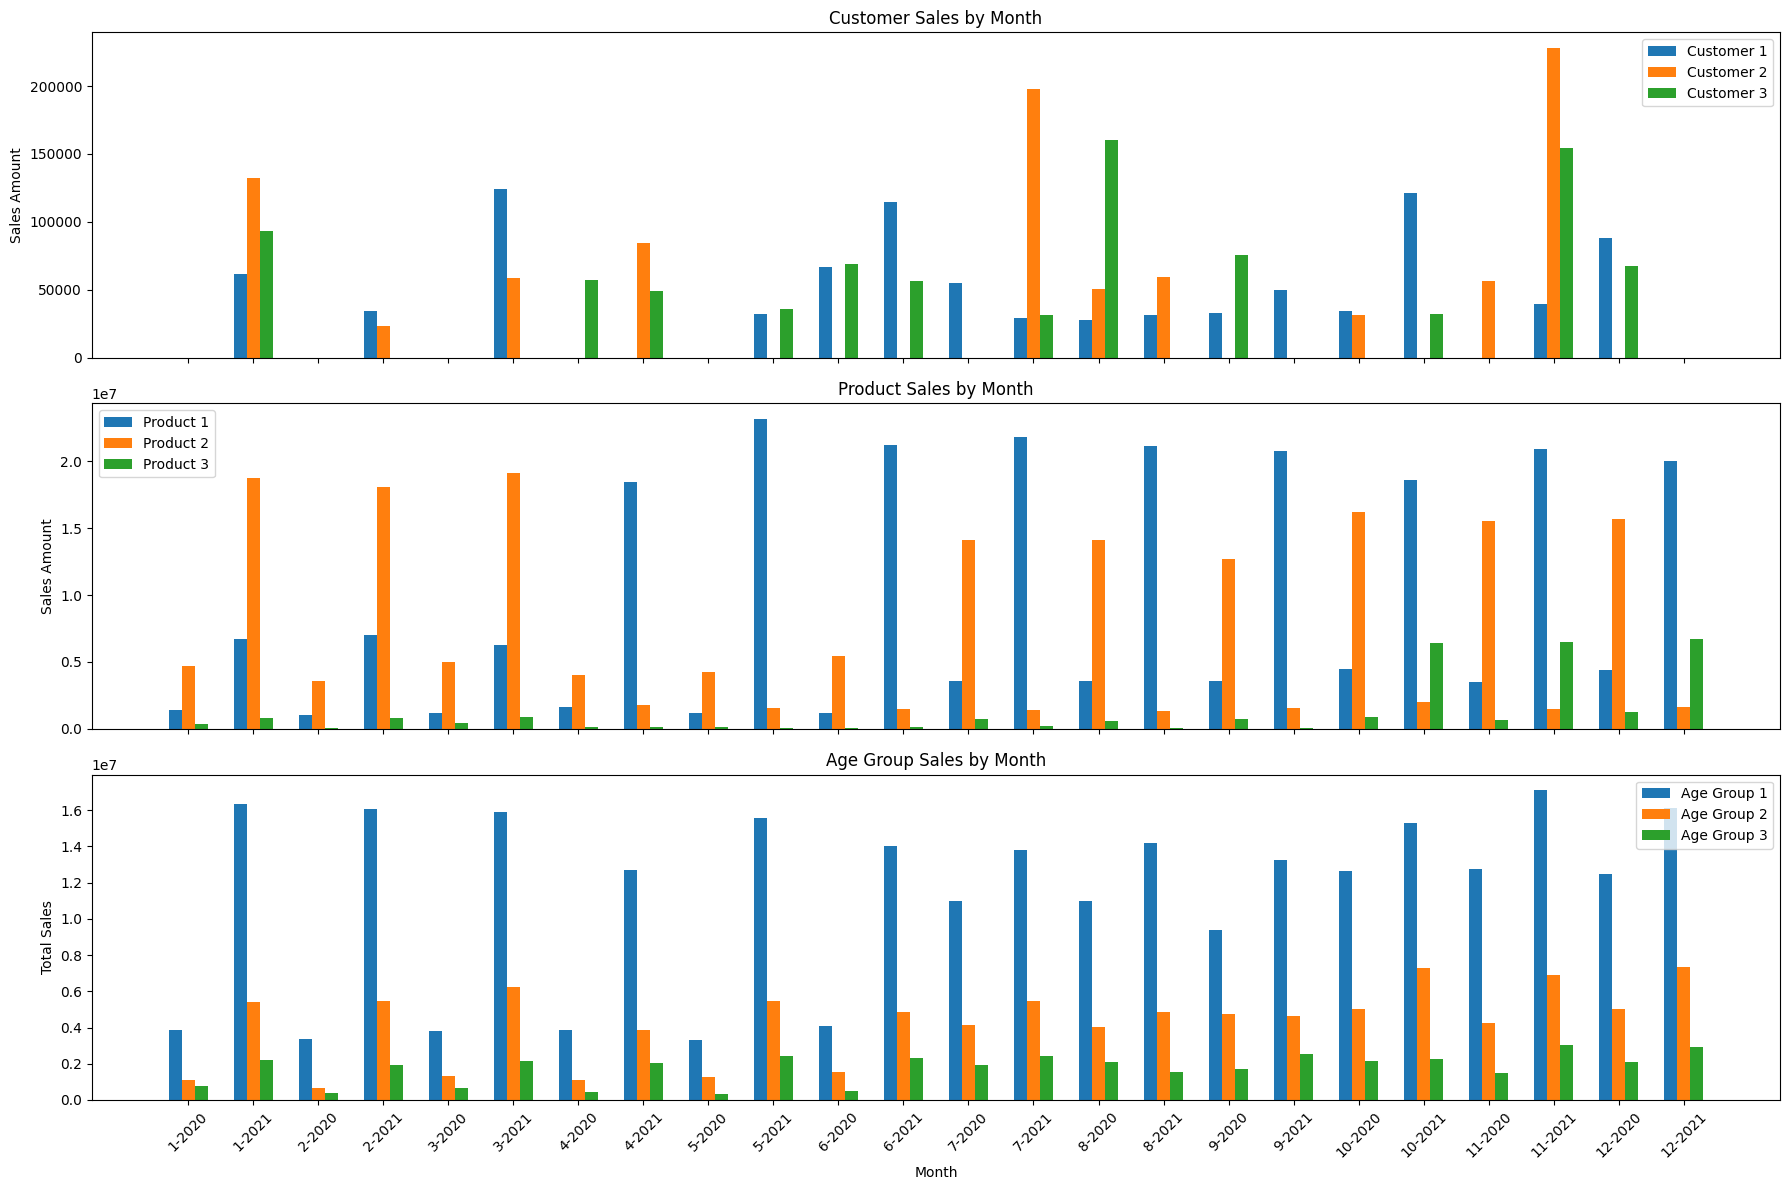

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# 월별 시간대 데이터 생성
months = sorted(data['Month'].unique())

# 서브플롯 설정
fig, axes = plt.subplots(3, 1, figsize=(18, 12), sharex=True)

# 각 서브플롯에 대해 데이터 그래프 그리기
for ax, category_data, category_name in zip(axes, [top_customer_data, top_product_data, top_age_data], ['Customer', 'Product', 'Age Group']):
    for i, category in enumerate(category_data):
        if category_name == 'Customer':
            category_sales = customer_sales_monthly[(customer_sales_monthly['CustID'] == category)]
        elif category_name == 'Product':
            category_sales = product_sales_monthly[(product_sales_monthly['ProdID'] == category)]
        else:
            category_sales = age_sales_monthly[(age_sales_monthly['AgeGroup'] == category)]

        sales_by_month = [category_sales[(category_sales['Year'] == year) & (category_sales['Month'] == month)]['sum'].iloc[0] if ((year, month) in zip(category_sales['Year'], category_sales['Month'])) and (category_sales[(category_sales['Year'] == year) & (category_sales['Month'] == month)].shape[0] > 0) else 0 for month in months for year in [2020, 2021]]
        ax.bar(np.arange(len(months) * 2) + i * 0.2, sales_by_month, width=0.2, label=f'{category_name} {i+1}')
        ax.legend()
        ax.set_title(f'{category_name} Sales by Month')
        ax.set_ylabel('Sales Amount')

# X축 설정
plt.xticks(np.arange(len(months) * 2) + 0.2, labels=[f'{month}-{year}' for month in months for year in [2020, 2021]], rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.legend()
plt.show()




- 이미 준비된 DataSET을 통해 존재하는 모든 정보들은 "Grouping"과 "Pivot Table"과 여러 수학적 통계적 함수를 적용하여 확보할 수 있으므로 따로 추가 적인 DB는 필요 없음. <br>
- 다만, 매출 정보에 대한 분석을 위해서 매출의 시간 추이에 대한 tracking이 필요하므로 현재 시간에 대해 random하게 생성된 'OrderDate' 컬럼의 dataframe을 시간 순으로 정렬할 필요가 있음 <br>
- *** 추가적으로 모든 정보들이 flatten되어 있는 최종 dataset도 필요하지만
simple한 접근을 위해서 보고자 하는 main 정보를 중심으로 simplified된 자료들로 매출 trend를 독립적으로 관측하는것이 필요함. <br>

==> <br>
Customers-Oriented / Products-Oriented DATA-SET 생성



In [59]:
sorted_data = data.sort_values(by='OrderDate').reset_index(drop=True)

In [60]:
sorted_data.head()

,OrderID,CustID,ProdID,Quantity,Gender,Age,Region,Price,OrderAmount,AgeGroup,PriceCategory,OrderDate,OrderDW,OrderTime,Year,Season,OrderTimeGroup,RegionName,Gender2,Month
0,107,10226,10,1,0,26,6,38554.017866,38554.017866,20s,High-Price,2020-01-01 21:58:00,Wednesday,21:58:00,2020,Winter,PrimeTime,I-City,Female,1
1,13,10455,10,2,0,28,5,23283.335066,46566.670132,20s,High-Price,2020-01-01 22:42:00,Wednesday,22:42:00,2020,Winter,PrimeTime,S-City,Female,1
2,51,10740,10,1,0,27,1,40161.631517,40161.631517,20s,High-Price,2020-01-01 23:47:00,Wednesday,23:47:00,2020,Winter,PrimeTime,Y-City,Female,1
3,379,10854,10,1,0,34,5,32216.372365,32216.372365,30s,High-Price,2020-01-01 23:54:00,Wednesday,23:54:00,2020,Winter,PrimeTime,S-City,Female,1
4,338,10393,10,1,0,29,10,31775.841343,31775.841343,20s,High-Price,2020-01-02 10:00:00,Thursday,10:00:00,2020,Winter,DayTime,G-City,Female,1


In [61]:
import os
os.chdir('/content/drive/MyDrive/KITA_2024/M3_분석라이브러리/M3_실습/')
#### 최종 Data-SET
sorted_data.to_csv('data_obj.csv', index=None)

##### 고객/물품 월별 매출 추이 분석을 위한 data sheet
customer_sales_monthly.to_csv('data_obj_Oriented_by_Customer.csv', index=None)
product_sales_monthly.to_csv('data_obj_Oriented_by_product.csv', index=None)
